In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1 = df.drop(['area_type','society','balcony','availability'],axis = 'columns')

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['BHK'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\parth\AppData\Local\Temp\ipykernel_2360\1263390123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [14]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df2['sqft'] = df['total_sqft'].apply(sqft_to_num)

C:\Users\parth\AppData\Local\Temp\ipykernel_2360\238007285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sqft'] = df['total_sqft'].apply(sqft_to_num)


In [19]:
df2.head()

,location,size,total_sqft,bath,price,BHK,sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [20]:
df2['sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [21]:
df3 = df2.drop(['size','total_sqft'],axis = 'columns')

In [22]:
df3.head()

,location,bath,price,BHK,sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


In [23]:
df3['price_per_square'] = (df3.price)*100000/(df3.sqft)
df3.head()

,location,bath,price,BHK,sqft,price_per_square
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [24]:
len(df3.location.unique())

1304

In [25]:
location_count = df3.location.value_counts()

In [26]:
locount_less_then10 = location_count[location_count<=10]

In [27]:
locount_less_then10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [28]:
len(locount_less_then10)

1063

In [29]:
df3.location = df3.location.apply(lambda x: 'others' if x in locount_less_then10 else x)

In [30]:
df3.head(-5)

,location,bath,price,BHK,sqft,price_per_square
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...
13310,Rachenahalli,2.0,52.71,2,1050.0,5020.000000
13311,Ramamurthy Nagar,9.0,250.00,7,1500.0,16666.666667
13312,Bellandur,2.0,47.00,2,1262.0,3724.247227
13313,Uttarahalli,2.0,57.00,3,1345.0,4237.918216


In [31]:
len(df3.location.value_counts())

242

In [32]:
df3.head()

,location,bath,price,BHK,sqft,price_per_square
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [33]:
df3.shape

(13246, 6)

In [36]:
df4 = df3[~((df3.sqft/df3.BHK)<300)]

In [37]:
df4.head()

,location,bath,price,BHK,sqft,price_per_square
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [38]:
df4.shape

(12502, 6)

In [39]:
df4.isna().sum()

location             0
bath                 0
price                0
BHK                  0
sqft                46
price_per_square    46
dtype: int64

In [40]:
df4.price_per_square.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_square, dtype: float64

In [43]:
df4.shape

(12502, 6)

In [45]:
def pps_outlier_remove(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_square)
        sd = np.std(subdf.price_per_square)
        reduced_df = subdf[(subdf.price_per_square>(mean-sd)) & (subdf.price_per_square <= (mean+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df5 = pps_outlier_remove(df4)

In [48]:
df5.shape

(10244, 6)

Text(0, 0.5, 'Count')

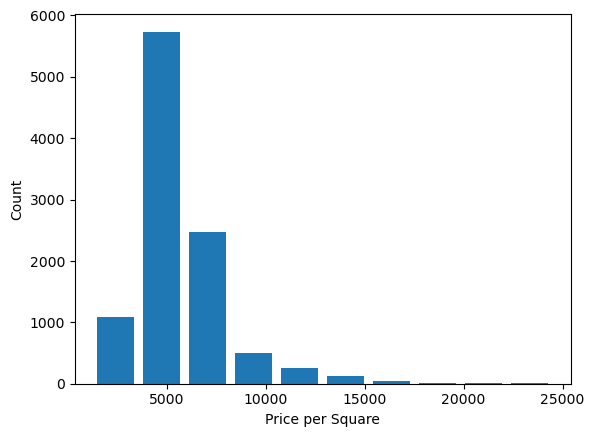

In [50]:
plt.hist(df5.price_per_square,rwidth = 0.8)
plt.xlabel('Price per Square')
plt.ylabel('Count')

In [51]:
df5.head()

,location,bath,price,BHK,sqft,price_per_square
0,Devarachikkanahalli,2.0,44.0,3,1250.0,3520.000000
1,Devarachikkanahalli,2.0,40.0,2,1250.0,3200.000000
2,Devarachikkanahalli,2.0,83.0,2,1200.0,6916.666667
3,Devarachikkanahalli,2.0,40.0,2,1170.0,3418.803419
4,Devarachikkanahalli,2.0,65.0,3,1425.0,4561.403509


In [52]:
df5.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

(array([6.546e+03, 2.620e+03, 9.120e+02, 1.070e+02, 4.400e+01, 1.000e+01,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

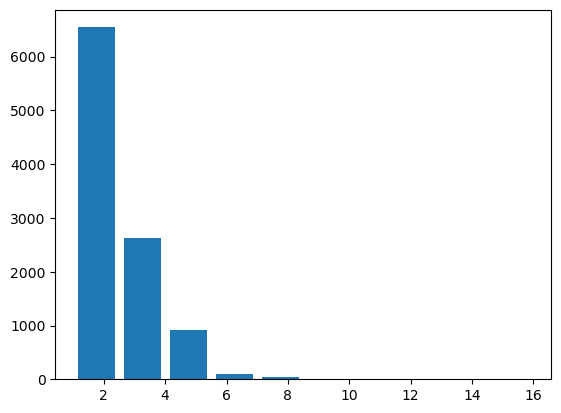

In [53]:
plt.hist(df5.bath,rwidth = 0.8)

In [55]:
df6 = df5[~(df5.bath>df5.BHK+2)]

In [57]:
df6.shape

(10240, 6)

In [59]:
df7 = df6.drop(['price_per_square'],axis = 'columns')

In [61]:
df7.head(3)

,location,bath,price,BHK,sqft
0,Devarachikkanahalli,2.0,44.0,3,1250.0
1,Devarachikkanahalli,2.0,40.0,2,1250.0
2,Devarachikkanahalli,2.0,83.0,2,1200.0


In [62]:
dummies = pd.get_dummies(df7.location)

In [63]:
df8 = pd.concat([df7,dummies],axis = 'columns')

In [64]:
df8.head()

,location,bath,price,BHK,sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,Devarachikkanahalli,2.0,44.0,3,1250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,2.0,40.0,2,1250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2.0,83.0,2,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2.0,40.0,2,1170.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,2.0,65.0,3,1425.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df8.drop(['others'],axis = 'columns',inplace = True)

In [66]:
df8.shape

(10240, 246)

In [67]:
df8.drop(['location'],axis = 'columns',inplace = True)

In [68]:
x = df8.drop(['price'],axis = 'columns')
y = df8.price

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [72]:
algos = {
    'LinearRegression':{
        'model' : LinearRegression(),
        'params' : {
            'normalize' : [True,False]
        }
    },
    'Lasso' : {
        'model':Lasso(),
        'params':{
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
    },
    'decision_tree': {
        'model' : DecisionTreeRegressor(),
        'params': {
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
        }
    }
}

In [73]:
from sklearn.model_selection import ShuffleSplit

In [77]:
def best_model_using_gridsearch(x,y):
    algos = {
        'LinearRegression':{
            'model' : LinearRegression(),
            'params' : {
                
            }
        },
        'Lasso' : {
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    cv = ShuffleSplit(n_splits=5,test_size = 0.2 , random_state = 0)
    scores = []
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv = cv , return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])

In [88]:
x.sqft.info()

<class 'pandas.core.series.Series'>
Int64Index: 10240 entries, 0 to 10243
Series name: sqft
Non-Null Count  Dtype  
--------------  -----  
10240 non-null  float64
dtypes: float64(1)
memory usage: 160.0 KB


In [78]:
best_model_using_gridsearch(x,y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,LinearRegression,0.813874,{}
1,Lasso,0.682751,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.704866,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

In [91]:
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8201833631364304

In [93]:
import pickle
with open ('Bangalore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [94]:
import json
columns = {
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))